In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [46]:
df = pd.read_csv('capo_data.csv')
df = df[df['case_id'] >= 5229]

### Initial Exploration

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3696 entries, 4534 to 8229
Data columns (total 100 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   case_id                  3696 non-null   int64  
 1   dem_age                  3689 non-null   float64
 2   dem_sex                  3692 non-null   float64
 3   dem_pregnant             893 non-null    float64
 4   dem_trimester            19 non-null     float64
 5   exam_height              2657 non-null   float64
 6   exam_weight              2747 non-null   float64
 7   exam_hr                  3621 non-null   float64
 8   exam_rr                  3092 non-null   float64
 9   exam_sbp                 3613 non-null   float64
 10  exam_dbp                 3610 non-null   float64
 11  exam_temp                3485 non-null   float64
 12  exam_o2sat               3677 non-null   float64
 13  exam_o2satvalue          3435 non-null   float64
 14  exam_fio2                

In [48]:
df.describe()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_fio2,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_bands,lab_platelets,lab_inr,lab_na,lab_k,lab_bun,lab_creatinine,lab_bicarb,lab_glucose,lab_albumin,lab_ast,lab_alt,lab_bilirubin,lab_trop1,lab_trop2,lab_trop3,lab_ckmb1,lab_ckmb2,lab_ckmb3,lab_ldl,lab_hdl,lab_cholesterol,lab_triglycerides,lab_lactate,lab_hga1c,lab_ldh,lab_bnp,lab_crp,lab_pct,lab_vitamind,lab_abg,lab_abgph,lab_abgpaco2,lab_abgpao2,lab_abgbicarb,lab_abgfio2,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
count,3696.000000,3689.000000,3692.000000,893.000000,19.000000,2657.000000,2747.000000,3621.000000,3092.000000,3613.000000,3610.000000,3485.000000,3677.000000,3435.000000,1833.000000,3539.000000,3533.000000,3318.000000,3610.000000,145.000000,3530.000000,135.000000,3536.000000,3518.000000,2935.000000,3493.000000,2237.000000,3223.000000,1995.000000,596.000000,628.000000,219.000000,1131.000000,410.000000,1053.000000,869.000000,303.000000,139.000000,636.000000,762.000000,935.000000,874.000000,75.000000,7.000000,1273.000000,570.000000,2397.000000,519.000000,5.000000,3672.000000,1696.000000,2429.000000,2170.000000,2388.000000,1651.000000,3625.000000,3626.000000,3634.000000,3623.000000,3634.000000,425.000000,410.000000,3667.000000,3668.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.00000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.00000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000
mean,8578.654491,63.320412,0.575840,0.025756,2.157895,158.660143,72.477976,99.760011,23.666235,126.138943,72.057895,37.515518,0.160457,91.823581,27.590835,0.148064,37.618865,12.597637,21.640607,11.067586,430.464890,1.793778,136.484813,4.014008,40.620146,1.524040,24.336147,139.741638,4.739714,55.620990,49.208599,2.649132,6.986492,18.325632,7.449018,184.112463,168.658033,142.194122,94.116352,38.087927,147.230684,121.009153,3.883067,32.742857,430.247447,2718.227623,74.322495,6.403778,34.640000,0.526688,7.434434,36.011826,67.106661,23.996482,24.278867,0.132966,0.183398,0.415245,0.102677,0.652174,0.230588,0.075610,0.004091,0.407852,0.077922,0.269481,0.168831,0.399080,0.228626,0.400703,0.280032,0.472944,0.280574,0.426677,0.318182,0.439935,0.276515,0.385823,0.317641,0.375812,0.238095,0.321158,0.268939,0.296266,0.17803,0.241342,0.205087,0.212662,0.129600,0.182359,0.150703,0.149892,0.116613,0.15395,0.133387,0.124729,0.248106,0.236201,0.255411,0.253247
std,4213.826271,19.874370,0.494282,0.158495,0.764719,36.979786,20.457169,25.772402,7.161933,26.115502,15.358259,1.291707,0.367079,7.055960,16.623416,0.355214,6.248322,2.562929,321.496785,27.952395,8061.203076,6.531617,5.480228,0.665083,34.611610,5.023375,5.172654,71.512514,6.548049,111.162015,100.939871,24.693274,128.091855,271.068492,132.738479,2073.353356,1032.510196,501.792867,64.144932,31.114369,45.058437,89.498923,5.490330,49.562985,302.567334,7532.527110,105.198423,65.017311,25.124649,0.499355,0.086011,10.116479,23.585707,4.922777,9.217903,0.339584,0.387046,0.492832,0.303579,0.476

In [49]:
df.isna().sum()

case_id                       0
dem_age                       7
dem_sex                       4
dem_pregnant               2803
dem_trimester              3677
exam_height                1039
exam_weight                 949
exam_hr                      75
exam_rr                     604
exam_sbp                     83
exam_dbp                     86
exam_temp                   211
exam_o2sat                   19
exam_o2satvalue             261
exam_fio2                  1863
exam_mental                 157
lab_hematocrit              163
lab_hemoglobin              378
lab_wbc                      86
lab_bands                  3551
lab_platelets               166
lab_inr                    3561
lab_na                      160
lab_k                       178
lab_bun                     761
lab_creatinine              203
lab_bicarb                 1459
lab_glucose                 473
lab_albumin                1701
lab_ast                    3100
lab_alt                    3068
lab_bili

In [50]:
df.head()

,case_id,dem_age,dem_sex,dem_pregnant,dem_trimester,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_fio2,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_bands,lab_platelets,lab_inr,lab_na,lab_k,lab_bun,lab_creatinine,lab_bicarb,lab_glucose,lab_albumin,lab_ast,lab_alt,lab_bilirubin,lab_trop1,lab_trop2,lab_trop3,lab_ckmb1,lab_ckmb2,lab_ckmb3,lab_ldl,lab_hdl,lab_cholesterol,lab_triglycerides,lab_lactate,lab_hga1c,lab_ldh,lab_bnp,lab_crp,lab_pct,lab_vitamind,lab_abg,lab_abgph,lab_abgpaco2,lab_abgpao2,lab_abgbicarb,lab_abgfio2,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_db,cx_du,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
4534,5229,64.0,1.0,NaN,NaN,NaN,NaN,150.0,30.0,130.0,80.0,37.8,0.0,92.0,21.0,0.0,42.0,15.0,22.0,NaN,363.0,NaN,129.0,3.0,NaN,2.0,22.0,104.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,35.0,64.0,22.0,21.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1
4535,5230,92.0,1.0,NaN,NaN,NaN,NaN,76.0,14.0,118.0,NaN,37.2,1.0,NaN,NaN,0.0,35.0,12.0,12.0,NaN,493.0,NaN,136.0,4.0,22.0,1.0,23.0,209.0,3.0,NaN,NaN,NaN,0.7,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,840.0,NaN,NaN,NaN,NaN,1.0,NaN,38.2,NaN,22.8,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4536,5231,60.0,1.0,NaN,NaN,178.0,101.0,104.0,22.0,150.0,78.0,37.2,1.0,NaN,NaN,0.0,43.0,10.0,10.0,NaN,368.0,NaN,140.0,4.0,18.0,1.0,30.0,162.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,42.0,175.0,165.0,NaN,NaN,673.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4537,5232,64.0,1.0,NaN,NaN,185.0,68.0,98.0,22.0,134.0,53.0,36.7,0.0,90.0,NaN,0.0,48.0,16.0,16.0,NaN,135.0,NaN,132.0,4.0,NaN,2.0,29.0,118.0,4.0,NaN,NaN,NaN,0.4,NaN,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,716.0,NaN,NaN,NaN,NaN,1.0,NaN,29.8,NaN,20.9,NaN,0.0,1.0,1.0,0.0,1.0,NaN,NaN,0.0,0.0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4538,5233,56.0,1.0,NaN,NaN,173.0,54.0,96.0,24.0,102.0,56.0,37.2,1.0,NaN,NaN,0.0,48.0,16.0,4.0,NaN,22.0,NaN,138.0,5.0,34.0,2.0,25.0,103.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,2.0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0


In [51]:
#Dropping all columns where 30% or more data is missing
df = df.dropna(axis=1, thresh=len(df) * 0.7)

In [52]:
df.head()

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
4534,5229,64.0,1.0,NaN,NaN,150.0,30.0,130.0,80.0,37.8,0.0,92.0,0.0,42.0,15.0,22.0,363.0,129.0,3.0,NaN,2.0,104.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,0,0,1,1,1,0,1,1,1,1,1
4535,5230,92.0,1.0,NaN,NaN,76.0,14.0,118.0,NaN,37.2,1.0,NaN,0.0,35.0,12.0,12.0,493.0,136.0,4.0,22.0,1.0,209.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
4536,5231,60.0,1.0,178.0,101.0,104.0,22.0,150.0,78.0,37.2,1.0,NaN,0.0,43.0,10.0,10.0,368.0,140.0,4.0,18.0,1.0,162.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4537,5232,64.0,1.0,185.0,68.0,98.0,22.0,134.0,53.0,36.7,0.0,90.0,0.0,48.0,16.0,16.0,135.0,132.0,4.0,NaN,2.0,118.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,1,0,1,0,1,1,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4538,5233,56.0,1.0,173.0,54.0,96.0,24.0,102.0,56.0,37.2,1.0,NaN,0.0,48.0,16.0,4.0,22.0,138.0,5.0,34.0,2.0,103.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0


In [53]:
df.isna().sum()

case_id                       0
dem_age                       7
dem_sex                       4
exam_height                1039
exam_weight                 949
exam_hr                      75
exam_rr                     604
exam_sbp                     83
exam_dbp                     86
exam_temp                   211
exam_o2sat                   19
exam_o2satvalue             261
exam_mental                 157
lab_hematocrit              163
lab_hemoglobin              378
lab_wbc                      86
lab_platelets               166
lab_na                      160
lab_k                       178
lab_bun                     761
lab_creatinine              203
lab_glucose                 473
lab_abg                      24
cx_rul                       71
cx_rml                       70
cx_rll                       62
cx_lul                       73
cx_lll                       62
cx_cav                       29
cx_pe                        28
day0test___cough              0
day0test

In [54]:
df.fillna(df.median(), inplace=True)

In [55]:
df.isna().sum()

case_id                    0
dem_age                    0
dem_sex                    0
exam_height                0
exam_weight                0
exam_hr                    0
exam_rr                    0
exam_sbp                   0
exam_dbp                   0
exam_temp                  0
exam_o2sat                 0
exam_o2satvalue            0
exam_mental                0
lab_hematocrit             0
lab_hemoglobin             0
lab_wbc                    0
lab_platelets              0
lab_na                     0
lab_k                      0
lab_bun                    0
lab_creatinine             0
lab_glucose                0
lab_abg                    0
cx_rul                     0
cx_rml                     0
cx_rll                     0
cx_lul                     0
cx_lll                     0
cx_cav                     0
cx_pe                      0
day0test___cough           0
day0test___afebrile        0
day0test___wbc             0
day0test___oral            0
day1test___cou

In [56]:
df.sample(10)

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral
5317,6156,26.0,0.0,168.0,62.0,104.0,44.0,110.0,60.0,38.9,0.0,91.0,0.0,36.0,12.7,11.00,116.0,133.0,3.00,12.0,1.00,120.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,1,0,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5025,5810,52.0,0.0,165.0,65.0,84.0,24.0,100.0,50.0,37.2,0.0,92.0,0.0,33.0,11.0,9.00,27.0,130.0,3.00,31.0,1.00,100.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
5258,6087,86.0,0.0,166.0,65.0,90.0,40.0,90.0,60.0,37.8,0.0,62.0,1.0,35.0,12.0,25.00,337.0,125.0,5.00,42.0,1.00,197.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1
5488,6386,53.0,0.0,166.0,61.0,101.0,16.0,142.0,88.0,37.2,0.0,94.0,0.0,37.0,12.7,8.00,229.0,136.0,4.00,31.0,1.00,77.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6208,7176,66.0,1.0,170.0,68.0,103.0,24.0,150.0,108.0,36.9,0.0,96.0,0.0,44.0,12.7,13.00,274.0,138.0,3.50,31.0,2.16,164.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7743,10004,54.0,1.0,167.0,70.0,82.0,20.0,120.0,80.0,37.0,0.0,94.0,0.0,16.0,12.7,13000.00,301000.0,134.0,4.00,23.0,0.64,280.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7602,8730,39.0,0.0,173.0,78.0,95.0,15.0,110.0,60.0,38.9,0.0,98.0,0.0,34.3,12.1,5.34,333.0,128.0,2.90,29.0,0.90,89.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5588,6503,57.0,0.0,167.0,70.0,92.0,18.0,104.0,83.0,38.3,0.0,90.0,0.0,36.7,12.9,17.30,146.0,137.0,3.50,22.0,0.70,116.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
5231,6059,39.0,0.0,150.0,54.0,117.0,31.0,124.0,73.0,38.3,0.0,94.0,0.0,40.0,13.0,4.00,93.0,135.0,4.00,16.0,1.00,120.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7440,8559,65.0,1.0,167.0,52.0,112.0,30.0,120.0,80.0,36.0,0.0,77.0,0.0,49.1,16.2,11.26,234.0,141.0,5.11,20.0,0.61,158.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,1,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0


In [57]:
#Creating TCS Column and setting and initial value
df['tcs'] = -1

for day in range(8):
    
    cols = [f"day{day}test___cough", f"day{day}test___afebrile", f"day{day}test___wbc", f"day{day}test___oral"]
    
    if all(col in df.columns for col in cols):
        total = df[cols[0]] + df[cols[1]] + df[cols[2]] + df[cols[3]]
        df.loc[(total == 4) & (df['tcs'] == -1), 'tcs'] = day
#If TCS is -1 still, right-censoring following the for loop to make it 8
df.loc[df['tcs'] == -1, 'tcs'] = 8

df.sample(10)

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral,tcs
6640,7639,86.0,1.0,158.0,57.0,88.0,24.0,160.0,62.0,36.9,0.0,95.0,0.0,38.8,12.4,20.90,388.0,137.0,4.2,17.00,1.10,225.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3
6340,7309,77.0,0.0,165.0,80.0,120.0,22.0,200.0,100.0,36.5,0.0,88.0,0.0,42.6,14.1,15.00,293.0,133.0,4.2,15.00,0.60,116.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,8
7637,8777,60.0,0.0,16.0,75.0,90.0,18.0,120.0,80.0,36.0,0.0,90.0,0.0,41.0,13.4,6.38,120.0,138.0,3.3,44.00,0.78,150.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,8
7303,8412,71.0,1.0,181.0,70.0,80.0,16.0,105.0,70.0,38.1,0.0,93.0,0.0,23.0,8.0,2.10,115.0,128.0,3.1,31.00,1.05,108.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6809,7844,75.0,1.0,170.0,82.0,70.0,30.0,157.0,78.0,39.0,0.0,89.0,0.0,38.1,12.6,11.60,217.0,133.0,4.6,34.02,2.30,347.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,8
5356,6202,18.0,1.0,175.0,150.0,123.0,48.0,162.0,95.0,38.9,0.0,93.0,1.0,60.0,19.0,14.00,210.0,136.0,6.0,83.00,1.00,87.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,8
4593,5295,76.0,1.0,167.0,70.0,76.0,22.0,140.0,80.0,38.3,0.0,97.0,0.0,28.0,9.0,9.00,55.0,126.0,5.0,162.00,2.00,120.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5
5062,5848,56.0,0.0,150.0,81.0,96.0,28.0,177.0,91.0,36.1,0.0,95.0,0.0,33.0,10.0,8.00,269.0,137.0,4.0,28.00,1.00,120.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,1,0,1,0,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
5773,6729,63.0,1.0,175.0,137.0,115.0,39.0,143.0,73.0,39.2,0.0,93.0,0.0,38.2,12.3,10.00,238.0,138.0,3.8,18.00,1.15,133.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,1,1,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4805,5561,81.0,0.0,160.0,48.0,104.0,22.0,105.0,60.0,39.4,0.0,94.0,0.0,36.0,12.0,12.00,352.0,133.0,4.0,55.00,1.00,109.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,5


In [58]:
df['tcs'].value_counts()

tcs
8    1156
3     530
2     504
4     479
1     346
5     310
6     167
7     145
0      59
Name: count, dtype: int64

In [59]:
def set_stability_by_day_7(row):
    if 0 <= row['tcs'] <= 7:
        return 1 #Stable by day seven
    else:
        return 0 #not stable by day seven

def set_early_or_late_tcs(row):
    if 0 <= row['tcs'] < 4:
        return 1 #early TCS
    else:
        return 0 #Late TCS
    

#applying the functions to each row and creating the new column
df['stable_by_day_7'] = df.apply(set_stability_by_day_7, axis=1)
df['early_or_late_tcs'] = df.apply(set_early_or_late_tcs, axis=1)

In [60]:
df.sample(10)

,case_id,dem_age,dem_sex,exam_height,exam_weight,exam_hr,exam_rr,exam_sbp,exam_dbp,exam_temp,exam_o2sat,exam_o2satvalue,exam_mental,lab_hematocrit,lab_hemoglobin,lab_wbc,lab_platelets,lab_na,lab_k,lab_bun,lab_creatinine,lab_glucose,lab_abg,cx_rul,cx_rml,cx_rll,cx_lul,cx_lll,cx_cav,cx_pe,day0test___cough,day0test___afebrile,day0test___wbc,day0test___oral,day1test___cough,day1test___afebrile,day1test___wbc,day1test___oral,day2test___cough,day2test___afebrile,day2test___wbc,day2test___oral,day3test___cough,day3test___afebrile,day3test___wbc,day3test___oral,day4test___cough,day4test___afebrile,day4test___wbc,day4test___oral,day5test___cough,day5test___afebrile,day5test___wbc,day5test___oral,day6test___cough,day6test___afebrile,day6test___wbc,day6test___oral,day7test___cough,day7test___afebrile,day7test___wbc,day7test___oral,over7daytest___cough,over7daytest___afebrile,over7daytest___wbc,over7daytest___oral,tcs,stable_by_day_7,early_or_late_tcs
6486,7466,31.0,1.0,167.0,70.0,122.0,40.0,124.0,85.0,38.9,1.0,94.0,0.0,44.3,14.6,21.00,266.0,131.0,3.30,31.0,1.36,120.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0
4747,5488,82.0,0.0,159.0,62.0,78.0,16.0,150.0,95.0,38.3,0.0,96.0,1.0,36.0,12.0,3.00,70.0,139.0,4.00,31.0,1.00,109.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,8,0,0
6111,7077,81.0,0.0,178.0,76.0,144.0,28.0,159.0,90.0,38.2,0.0,81.0,0.0,11.9,3.8,18.20,255.0,135.0,4.10,31.0,1.60,342.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0
7137,8201,89.0,0.0,15.0,53.0,120.0,30.0,210.0,110.0,38.2,0.0,90.0,0.0,40.1,13.5,7.26,240.0,139.0,4.10,60.0,1.01,136.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0,0,0,1,0,1,0,1,0,1,0,1,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,1,1,1,0,0,0,0,6,1,0
7517,8638,81.0,1.0,164.0,66.0,110.0,50.0,110.0,65.0,36.9,0.0,88.0,0.0,51.5,15.8,16.76,252.0,145.0,4.40,45.0,0.90,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1
7628,8759,82.0,1.0,177.0,65.0,103.0,28.0,170.0,80.0,39.8,0.0,93.0,0.0,44.9,15.3,9.29,167.0,142.0,4.20,57.0,0.76,169.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0
7387,8498,78.0,1.0,173.0,92.0,88.0,18.0,120.0,75.0,37.4,0.0,87.0,0.0,36.5,12.2,9.84,110.0,138.0,3.54,82.0,1.18,184.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
5022,5807,66.0,1.0,167.0,70.0,156.0,37.0,136.0,89.0,38.3,0.0,93.0,0.0,44.0,15.0,18.00,88.0,140.0,5.00,82.0,1.00,187.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,8,0,0
4823,5580,83.0,0.0,167.0,70.0,88.0,22.0,132.0,55.0,37.2,0.0,94.0,1.0,30.0,10.0,2.00,11.0,147.0,4.00,96.0,1.00,100.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,8,0,0
7892,17007,42.0,1.0,167.0,65.0,154.0,28.0,120.0,78.0,39.3,1.0,81.0,0.0,38.0,8.5,13.15,206.0,132.0,2.40,128.5,4.50,120.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0


In [61]:
df = df[df.columns.drop(list(df.filter(regex='day0')))]
df = df[df.columns.drop(list(df.filter(regex='over7')))]
df.drop(columns=['case_id'], inplace=True)

df_original = df.copy()

df = df[df.columns.drop(list(df.filter(regex='lab')))]


### Logistic Regression Models

Predicting if the patient will be stable within seven days

In [62]:
#assigning columns to X and y for model building
X1 = df.drop('stable_by_day_7',axis = 1)
y1 = df[['stable_by_day_7']]
#removing unnecessary columns from model
X1 = X1[X1.columns.drop(list(df.filter(regex='test')))]
X1.drop(columns = ['tcs','early_or_late_tcs'], inplace=True)


In [63]:
X1_train, X1test, y1_train, y1_test = train_test_split(X1, y1,
                                                   test_size = .33,
                                                   random_state = 0)

In [64]:
classifier1=LogisticRegression(max_iter=10000)
classifier1.fit(X1_train.values,y1_train.values.ravel())

LogisticRegression(max_iter=10000)

In [65]:
y1_pred = classifier1.predict(X1_test.values)

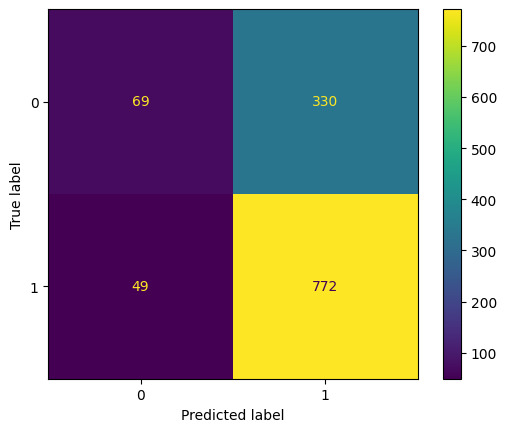

In [66]:
cm1 = confusion_matrix(y1_test, y1_pred)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1)
disp1.plot()
plt.show()

In [67]:
print(classification_report(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.58      0.17      0.27       399
           1       0.70      0.94      0.80       821

    accuracy                           0.69      1220
   macro avg       0.64      0.56      0.53      1220
weighted avg       0.66      0.69      0.63      1220



Seeing if results improve by adding lab results

In [68]:
X2 = df_original.drop('stable_by_day_7',axis = 1)
y2 = df_original[['stable_by_day_7']]
#removing unnecessary columns from model
X2 = X2[X2.columns.drop(list(df.filter(regex='test')))]
X2.drop(columns = ['tcs','early_or_late_tcs'], inplace=True)

In [69]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2,
                                                   test_size = .33,
                                                   random_state = 0)

In [70]:
classifier2=LogisticRegression(max_iter=10000)
classifier2.fit(X2_train.values,y2_train.values.ravel())

LogisticRegression(max_iter=10000)

In [71]:
y2_pred = classifier2.predict(X2_test.values)

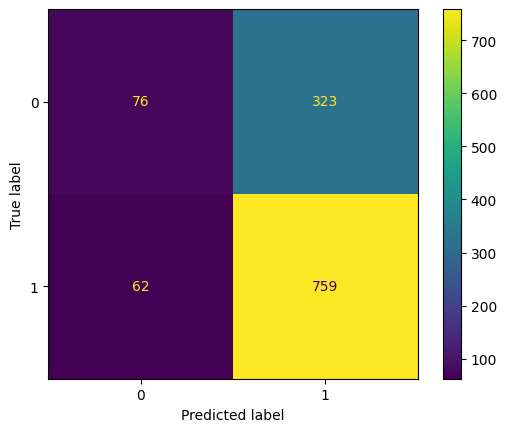

In [72]:
cm2 = confusion_matrix(y2_test, y2_pred)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

In [73]:
print(classification_report(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.55      0.19      0.28       399
           1       0.70      0.92      0.80       821

    accuracy                           0.68      1220
   macro avg       0.63      0.56      0.54      1220
weighted avg       0.65      0.68      0.63      1220



Predicting if the patient will have early or late clinical stability

In [89]:
#assigning columns to X and y for model building
Z3 = df.drop('early_or_late_tcs',axis = 1)
w3= df[['early_or_late_tcs']]
#removing unnecessary columns from model
Z3 = Z3[Z3.columns.drop(list(df.filter(regex='test')))]
Z3.drop(columns = ['tcs','stable_by_day_7'], inplace=True)

In [93]:
Z3_train, Z3_test, w3_train, w3_test = train_test_split(Z3, w3,
                                                   test_size = .33,
                                                   random_state = 0)

In [94]:
classifier3=LogisticRegression(max_iter=10000)
classifier3.fit(Z3_train.values,w3_train.values.ravel())

LogisticRegression(max_iter=10000)

In [95]:
w3_pred = classifier3.predict(Z3_test.values)

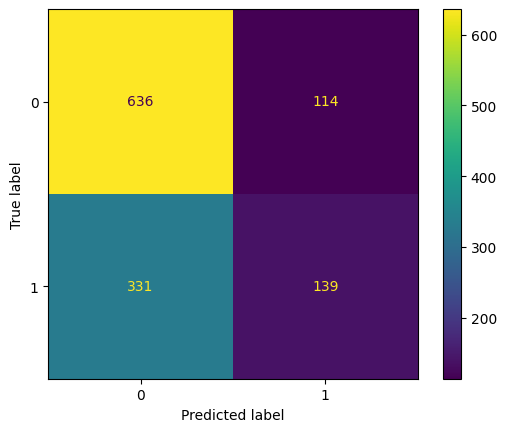

In [96]:
cm3 = confusion_matrix(w3_test, w3_pred)
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

In [97]:
print(classification_report(w3_test,w3_pred))

              precision    recall  f1-score   support

           0       0.66      0.85      0.74       750
           1       0.55      0.30      0.38       470

    accuracy                           0.64      1220
   macro avg       0.60      0.57      0.56      1220
weighted avg       0.62      0.64      0.60      1220



Seeing if results improve by adding lab results

In [99]:
#assigning columns to X and y for model building
Z4 = df_original.drop('early_or_late_tcs',axis = 1)
w4 = df_original[['early_or_late_tcs']]
#removing unnecessary columns from model
Z4 = Z4[Z4.columns.drop(list(df.filter(regex='test')))]
Z4.drop(columns = ['tcs','stable_by_day_7'], inplace=True)

In [100]:
Z4_train, Z4_test, w4_train, w4_test = train_test_split(Z4, w4,
                                                   test_size = .33,
                                                   random_state = 0)

In [101]:
classifier4=LogisticRegression(max_iter=10000)
classifier4.fit(Z4_train.values,w4_train.values.ravel())

LogisticRegression(max_iter=10000)

In [102]:
w4_pred = classifier4.predict(Z4_test.values)

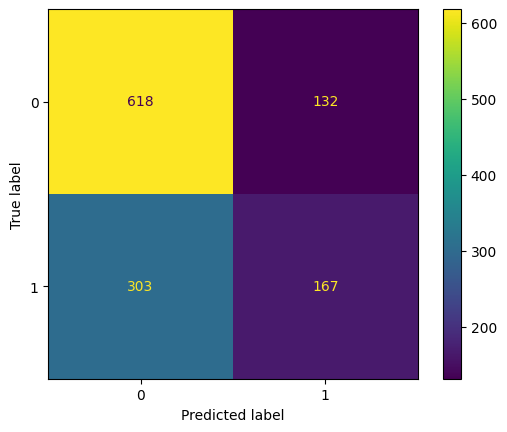

In [103]:
cm4 = confusion_matrix(w4_test, w4_pred)
disp4 = ConfusionMatrixDisplay(confusion_matrix=cm4)
disp4.plot()
plt.show()

In [104]:
print(classification_report(w4_test,w4_pred))

              precision    recall  f1-score   support

           0       0.67      0.82      0.74       750
           1       0.56      0.36      0.43       470

    accuracy                           0.64      1220
   macro avg       0.61      0.59      0.59      1220
weighted avg       0.63      0.64      0.62      1220

